In [1]:
import pandas as pd

C:\Users\chouk\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [241]:
movies= pd.read_csv(r"D:\ML Complete documents\ML Hackathon\movie_data\movies.csv")
links = pd.read_csv(r"D:\ML Complete documents\ML Hackathon\movie_data\links.csv")
ratings = pd.read_csv(r"D:\ML Complete documents\ML Hackathon\movie_data\ratings.csv")
tags =  pd.read_csv(r"D:\ML Complete documents\ML Hackathon\movie_data\tags.csv")

# 1. Download the data from the above link. How many ".csv" files are available in the dataset?

# 4

# 2. What is the shape of "movies.csv"?

In [17]:
movies = pd.read_csv(r"D:\ML Complete documents\ML Hackathon\movie_data\movies.csv")

In [18]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
movies.shape

(9742, 3)

# 3. What is the shape of "ratings.csv"?


In [20]:
ratings.shape

(100836, 4)

In [178]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# 4. How many unique "userId" are available in "ratings.csv"?

In [23]:
ratings["userId"].nunique()

610

# 5. Which movie has recieved maximum number of user ratings?

In [58]:
max_ratings = ratings.groupby(["movieId","rating"])[["userId"]].count()

userId
movieId rating        
1       0.5          1
        1.5          1
        2.0          6
        2.5          8
        3.0         34
...                ...
193581  4.0          1
193583  3.5          1
193585  3.5          1
193587  3.5          1
193609  4.0          1

[30417 rows x 1 columns]

In [65]:
max_ratings[max_ratings["userId"]  == max_ratings["userId"].max()]

,,userId
movieId,rating,
318,5.0,153


In [66]:
movies[movies["movieId"] == 318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


# 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [67]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [71]:
movies [movies["title"] == "Matrix, The (1999)"]["movieId"]

1939    2571
Name: movieId, dtype: int64

In [84]:
tags[tags["movieId"] == 2571]["tag"].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

# 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [87]:
movies[movies["title"] == "Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [91]:
ratings[ratings["movieId"] == 589]["rating"].mean()

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [92]:
movies[movies["title"] == "Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [109]:
ratings[ratings["movieId"] == 2959]["rating"].value_counts()

rating
5.0    81
4.5    49
4.0    49
3.5    17
3.0    10
2.0     5
0.5     3
2.5     3
1.5     1
Name: count, dtype: int64

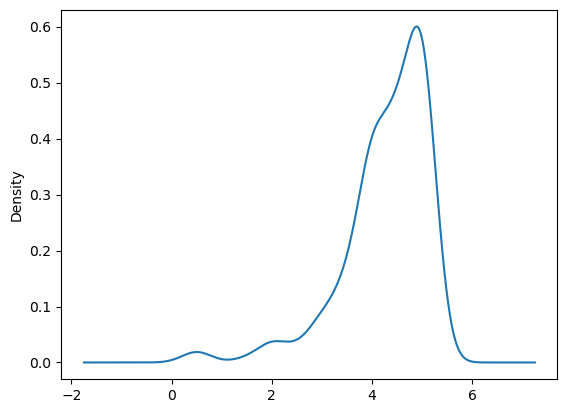

In [97]:
rat = ratings[ratings["movieId"] == 2959]["rating"].plot(kind="kde")

### 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

# 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [116]:
grp = ratings.groupby("movieId")[["rating"]].count()

In [117]:
ratings.groupby("movieId")[["rating"]].count()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [115]:
ratings.groupby("movieId")[["rating"]].mean()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [122]:
note_df = pd.merge(left = movies,right=grp,how="inner",on="movieId")
note_df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


In [126]:
note_df=note_df.rename(columns={"rating":"rating_count"})
note_df

,movieId,title,genres,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [131]:
note_df=note_df[note_df["rating_count"]>50]
note_df

,movieId,title,genres,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
5,6,Heat (1995),Action|Crime|Thriller,102
6,7,Sabrina (1995),Comedy|Romance,54
...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59


In [148]:
note_df2 = pd.merge(left=ratings,right=note_df,how="inner")
note_df2

,userId,movieId,rating,timestamp,title,genres,rating_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,52
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,102
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204
...,...,...,...,...,...,...,...
40655,610,106782,4.5,1479542155,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54
40656,610,109374,4.5,1493845137,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52
40657,610,109487,3.5,1493845041,Interstellar (2014),Sci-Fi|IMAX,73
40658,610,112852,4.5,1493845402,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59


In [157]:
note_df2["rating_count"].nunique()

127

# 1. Which movie is the most popular based on  average user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [170]:
df = note_df2.groupby("movieId")[["rating"]].mean()
df

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
6,3.946078
7,3.185185
...,...
106782,3.916667
109374,3.778846
109487,3.993151


In [173]:
df[df["rating"]==df["rating"].max()]

,rating
movieId,
318,4.429022


In [176]:
movies[movies["movieId"] == 318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [195]:
note_df2.sort_values(by="rating_count",ascending=False)

,userId,movieId,rating,timestamp,title,genres,rating_count
17657,276,356,5.0,858351182,Forrest Gump (1994),Comedy|Drama|Romance|War,329
6538,100,356,4.0,1100184829,Forrest Gump (1994),Comedy|Drama|Romance|War,329
34144,523,356,4.5,1503125976,Forrest Gump (1994),Comedy|Drama|Romance|War,329
33461,511,356,4.5,1450094222,Forrest Gump (1994),Comedy|Drama|Romance|War,329
37639,587,356,4.0,953138612,Forrest Gump (1994),Comedy|Drama|Romance|War,329
...,...,...,...,...,...,...,...
28066,430,4239,4.0,987107877,Blow (2001),Crime|Drama,51
19915,307,145,3.0,1186085751,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51
15189,234,1215,2.0,1004408088,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51
14326,224,2100,5.0,971812094,Splash (1984),Comedy|Fantasy|Romance,51


In [205]:
d = note_df2.groupby("movieId")[["rating_count"]].sum()
d.sort_values(by="rating_count",ascending=False).head(5)

,rating_count
movieId,
356,108241
318,100489
296,94249
593,77841
2571,77284


In [211]:
movies[movies["movieId"] == 2571]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [244]:
a = note_df2[note_df2['genres'].str.contains('sci-fi', case=False, regex=True)]
a

,userId,movieId,tag,timestamp
31,49,109487,sci-fi,1493093332
121,62,27660,sci-fi,1525554491
277,62,108190,sci-fi,1525554839
406,76,260,sci-fi,1439165588
451,125,7254,sci-fi,1474381448
521,184,6283,sci-fi,1537094503
552,205,260,sci-fi,1519899078
717,424,260,sci-fi,1457900766
732,424,541,sci-fi,1457900918
736,424,589,sci-fi,1457844847


In [246]:
g = pd.merge(f,note_df2,how='inner',on='movieId')
g

,userId_x,movieId,tag,timestamp_x,userId_y,rating,timestamp_y,title,genres,rating_count
0,49,109487,sci-fi,1493093332,2,3.0,1445715145,Interstellar (2014),Sci-Fi|IMAX,73
1,49,109487,sci-fi,1493093332,10,0.5,1455398092,Interstellar (2014),Sci-Fi|IMAX,73
2,49,109487,sci-fi,1493093332,15,4.0,1510571878,Interstellar (2014),Sci-Fi|IMAX,73
3,49,109487,sci-fi,1493093332,18,4.5,1455050087,Interstellar (2014),Sci-Fi|IMAX,73
4,49,109487,sci-fi,1493093332,21,3.0,1423422297,Interstellar (2014),Sci-Fi|IMAX,73
...,...,...,...,...,...,...,...,...,...,...
2518,599,924,sci-fi,1498456751,600,4.0,1237708613,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,109
2519,599,924,sci-fi,1498456751,603,5.0,1000194332,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,109
2520,599,924,sci-fi,1498456751,606,5.0,1171310501,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,109
2521,599,924,sci-fi,1498456751,608,3.0,1147210995,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,109


In [247]:
d = g.groupby("movieId")[["rating_count"]].sum()
d.sort_values(by="rating_count",ascending=False).head(5)

,rating_count
movieId,
260,189003
2571,77284
589,50176
1196,44521
79132,20449


In [317]:
movies[movies["movieId"] == 480]

,movieId,title,genres
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


# 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [305]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [306]:
note2_df = pd.merge(links,note_df2,how="inner")
note2_df

,movieId,imdbId,tmdbId,userId,rating,timestamp,title,genres,rating_count
0,1,114709,862.0,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,1,114709,862.0,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,1,114709,862.0,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,1,114709,862.0,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,1,114709,862.0,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
...,...,...,...,...,...,...,...,...,...
40655,122904,1431045,293660.0,561,2.0,1491095067,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54
40656,122904,1431045,293660.0,586,4.0,1529899267,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54
40657,122904,1431045,293660.0,596,4.0,1535709074,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54
40658,122904,1431045,293660.0,599,3.5,1519457935,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54


In [307]:
note2_df["imdbId"]

0         114709
1         114709
2         114709
3         114709
4         114709
          ...   
40655    1431045
40656    1431045
40657    1431045
40658    1431045
40659    1431045
Name: imdbId, Length: 40660, dtype: int64

In [256]:
for i in note2_df['imdbId']:
    print(f"http://www.imdb.com/title/tt0{i}")

http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt0114709
http://www.imdb.com/title/tt

In [264]:
#Importing the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup


imdbRatings = []
comb_url = []
for i in note2_df["imdbId"]:
    url = f"http://www.imdb.com/title/tt0{i}"
    comb_url.append(url)


# Assuming comb_url is a list of URLs
for i in comb_url:
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    page = requests.get(i, headers=request_header)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    span_element = soup.find("span", class_="sc-eb51e184-1 ljxVSS")
    if span_element is not None:
        # Assuming you want to extract text or perform some action if span_element is found
        ratings_imdb = span_element.text  # or some other action
    else:
        ratings_imdb = np.nan  # Default value if span_element is not found

    imdbRatings.append(ratings_imdb)  # To see the output or do something else with ratings_imdb





note2_df['imdb_rating'] = imdbRatings

In [311]:
note2_df = pd.read_csv(r"C:\Users\chouk\Downloads\imdbratings.csv")

In [312]:
note2_df

,Unnamed: 0,movieId,title,genres,num_ratings,avg_rating,imdbId,tmdbId,imdb_Ratings
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.7
3,3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,NaN
433,433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,NaN


In [313]:
movies[movies["movieId"] == 318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [314]:
movies[movies["movieId"] == 109487]

,movieId,title,genres
8376,109487,Interstellar (2014),Sci-Fi|IMAX
